Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/10
71/71 [==============================] - 90s 1s/step - loss: 1.1295 - accuracy: 0.4702 - val_loss: 0.8481 - val_accuracy: 0.6173
Epoch 2/10
71/71 [==============================] - 82s 1s/step - loss: 0.8009 - accuracy: 0.6409 - val_loss: 0.8112 - val_accuracy: 0.6347
Epoch 3/10
71/71 [==============================] - 81s 1s/step - loss: 0.7067 - accuracy: 0.6969 - val_loss: 0.6795 - val_accuracy: 0.7093
Epoch 4/10
71/71 [==============================] - 82s 1s/step - loss: 0.6160 - accuracy: 0.7516 - val_loss: 0.8398 - val_accuracy: 0.6413
Epoch 5/10
71/71 [==============================] - 79s 1s/step - loss: 0.4803 - accuracy: 0.8120 - val_loss: 0.7464 - val_accuracy: 0.7120
Epoch 6/10
71/71 [==============================] - 79s 1s/step - loss: 0.3869 - accuracy: 0.8471 - val_loss: 0.8890 - val_accuracy: 0.7013
Epoch 7/10
71/71 [==============================] - 82s 1s/step - loss: 0.239

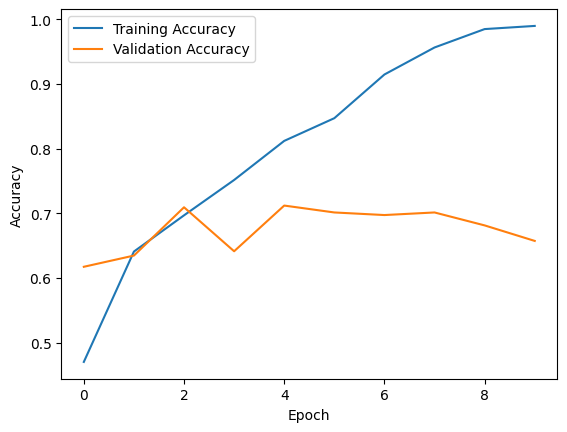

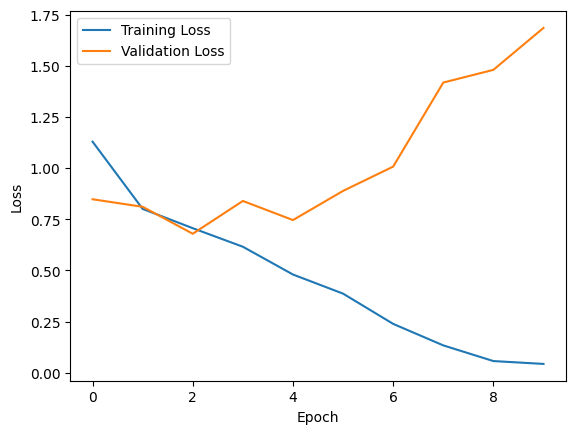

1/1 [==============================] - 0s 367ms/step


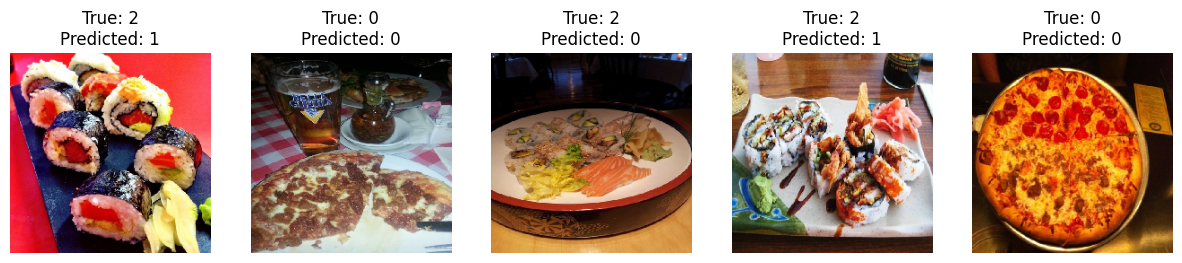

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

# Завдання 1: Вибір Класів для Класифікації
selected_classes = ['pizza', 'steak', 'sushi']

# Завдання 2: Попередня Обробка Даних

# Шляхи до папок тренувального та тестового наборів
train_dir = './train'
test_dir = './test'

# Розміри зображень та інші параметри попередньої обробки
image_size = (224, 224)
batch_size = 32

# Попередня обробка даних та створення генераторів
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=selected_classes
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=selected_classes
)

# Завдання 3: Розробка Моделі CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(selected_classes), activation='softmax')
])

# Компіляція моделі
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Завдання 4: Тренування та Оцінка Моделі
epochs = 10
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

# Оцінка моделі на тестовому наборі
test_loss, test_accuracy = model.evaluate(test_generator)

# Запис результатів
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Завдання 5: Аналіз Результатів
# Виведення графіка точності та втрат
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Функція для візуалізації передбачень
def visualize_predictions(model, test_generator, num_images=5):
    test_images, true_labels = next(test_generator)
    predictions = model.predict(test_images)
    predicted_labels = np.argmax(predictions, axis=1)

    plt.figure(figsize=(15, 8))
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(test_images[i])
        plt.title(f'True: {true_labels[i].argmax()}\nPredicted: {predicted_labels[i]}')
        plt.axis('off')

    plt.show()

# Виклик функції для візуалізації передбачень
visualize_predictions(model, test_generator, num_images=5)

